In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import plot_roc_curve, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [3]:
df=pd.read_csv("./data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
X_train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [7]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [8]:
# Models to test

models = {"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest Classifier": RandomForestClassifier()}

In [9]:
# Function to fit and evaluate model

def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    """
    Fits Machine Learning models on training data and returns their scores on testing data.
    
    models: Takes a dictionary with Scikit-Learn ML model names and their respective functions as input.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    
    """
    np.random.seed(42)
    model_score={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name]=model.score(X_test, y_test)
    return model_score

In [10]:
model_score = fit_and_evaluate(models = models, X_train = X_train, X_test = X_test, 
                y_train = y_train, y_test = y_test)

C:\Users\shubh\Desktop\ML_ZeroToMastery\Heart-Disease-Project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

In [12]:
model_compare = pd.DataFrame(model_score, index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest Classifier
accuracy,0.885246,0.688525,0.836066


,accuracy
Logistic Regression,0.885246
KNN,0.688525
Random Forest Classifier,0.836066


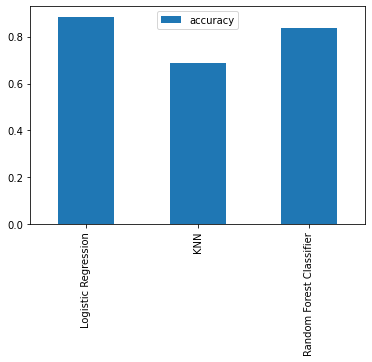

In [13]:
model_compare2 = pd.DataFrame(model_score, index=["accuracy"])
model_compare2.T.plot.bar();
model_compare2.T

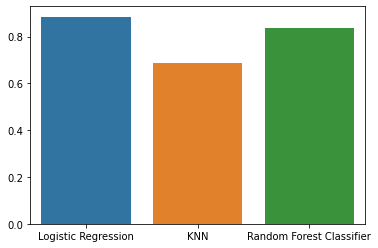

In [14]:
sns.barplot(data=model_compare)

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

### Hyperparameter tuning of K Nearest Neighbors Classifier

### Hyperparameter tuning (by hand)

In [14]:
train_score = []
test_score = []
np.random.seed(42)
knn= KNeighborsClassifier()
neighbors = range(1,21)
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

In [15]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [16]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

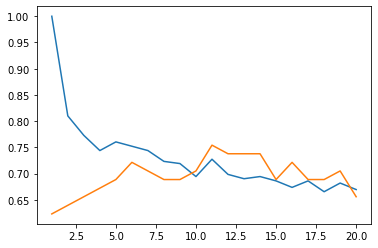

In [17]:
sns.lineplot(x = neighbors, y = train_score)
sns.lineplot(x = neighbors, y = test_score)

In [18]:
max(test_score)

0.7540983606557377

Maximum KNN score on the test data: 75.41%


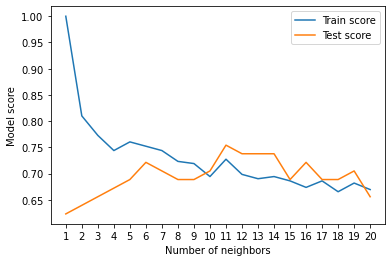

In [19]:
plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

### Hyperparameter tuning using automated methods (GridSearchCV and RandomizedSearchCV)

In [20]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
np.random.seed(42)
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print("Best model accuracy: ", clf.score(X_test,y_test))

Best leaf_size: 1
Best p: 1
Best n_neighbors: 7
Best model accuracy:  0.8032786885245902


In [21]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree','kd_tree','brute']
np.random.seed(42)
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, weights=weights, algorithm = algorithm)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=6, verbose=True)
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_model.best_estimator_.get_params()['weights'])
print('Best algorithm:', best_model.best_estimator_.get_params()['algorithm'])
print("Best model accuracy: ", clf.score(X_test,y_test))
print("Best parameters : ", clf.best_params_)

Fitting 6 folds for each of 22736 candidates, totalling 136416 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 136416 out of 136416 | elapsed: 14.5min finished


Best leaf_size: 1
Best p: 1
Best n_neighbors: 5
Best weights: distance
Best algorithm: auto
Best model accuracy:  0.7213114754098361
Best parameters :  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [23]:
print("Best parameters : ", best_model.best_params_,"  using rd_knn: ", clf.best_params_)
print("Best model accuracy on test data: ", best_model.score(X_test,y_test), "  using rd_knn: ", clf.score(X_test, y_test))
print("Best model accuracy on train data: ", best_model.score(X_train,y_train), "  using rd_knn: ", clf.score(X_train, y_train))


Best parameters :  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}   using rd_knn:  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best model accuracy on test data:  0.7213114754098361   using rd_knn:  0.7213114754098361
Best model accuracy on train data:  1.0   using rd_knn:  1.0


In [203]:
# np.random.seed(42)

#hyperparameter dictionary to tune
knn_grid = {"leaf_size": list(range(20,200)),
                  "n_neighbors": [5, 7, 9, 11, 13, 21],
                    "p":[1,2],
                  "weights":['uniform'],
                  "algorithm": ['ball_tree','kd_tree']}

#Create new KNN object
knn_3 = KNeighborsClassifier()

rd_knn = RandomizedSearchCV(knn_3,
                           param_distributions = knn_grid,
                           cv=5,
                           n_iter = 60,
                            verbose = True
                           )
best_model = rd_knn.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.6s finished


In [204]:
print("Best parameters : ", best_model.best_params_)
print("Best model accuracy on test data: ", best_model.score(X_test,y_test))
print("Best model accuracy on train data: ", best_model.score(X_train,y_train))


Best parameters :  {'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'leaf_size': 348, 'algorithm': 'ball_tree'}
Best model accuracy on test data:  0.7049180327868853
Best model accuracy on train data:  0.7933884297520661


In [223]:

np.random.seed(42)
#Convert to dictionary
knn_grid = {"leaf_size": list(range(20,200)),
                  "n_neighbors": [5, 7, 9, 11, 13, 21],
                    "p":[1,2],
                  "weights":['uniform'],
                  "algorithm": ['ball_tree','kd_tree']}

#Create new KNN object
knn_4 = KNeighborsClassifier()
#Use GridSearch
gd_knn = GridSearchCV(knn_4, knn_grid, cv=7, verbose=True)
best_model = gd_knn.fit(X_train,y_train)

Fitting 7 folds for each of 4320 candidates, totalling 30240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30240 out of 30240 | elapsed:  3.0min finished


In [224]:
print("Best parameters : ", best_model.best_params_)
print("Best model accuracy on test data: ", best_model.score(X_test,y_test))
print("Best model accuracy on train data: ", best_model.score(X_train,y_train))


Best parameters :  {'algorithm': 'ball_tree', 'leaf_size': 104, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best model accuracy on test data:  0.7049180327868853
Best model accuracy on train data:  0.7933884297520661


In [209]:
model_knn={"KNN":KNeighborsClassifier(n_neighbors=11)}
model_score_knn = fit_and_evaluate(models = model_knn, X_train = X_train, X_test = X_test, 
                y_train = y_train, y_test = y_test)


In [210]:
model_score_knn

{'KNN': 0.7540983606557377}

In [220]:
knn_5 = KNeighborsClassifier(n_neighbors=11,leaf_size=104,algorithm="ball_tree",p=1).fit(X_train,y_train)
knn_5.score(X_test,y_test), knn_5.score(X_train,y_train)


(0.7704918032786885, 0.7272727272727273)

In [221]:

np.random.seed(42)
#Convert to dictionary
knn_grid = {"leaf_size": list(range(20,200)),
                  "n_neighbors": [5, 7, 9, 11, 13, 21],
                    "p":[1,2],
                  "weights":['uniform'],
                  "algorithm": ['ball_tree','kd_tree']}

#Create new KNN object
knn_4 = KNeighborsClassifier()
#Use GridSearch
gd_knn = GridSearchCV(knn_4, knn_grid, cv=7, verbose=True)
best_model = gd_knn.fit(X,y)

Fitting 7 folds for each of 4320 candidates, totalling 30240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30240 out of 30240 | elapsed:  3.2min finished


In [222]:
print("Best parameters : ", best_model.best_params_)
print("Best model accuracy on test data: ", best_model.score(X_test,y_test))
print("Best model accuracy on train data: ", best_model.score(X_train,y_train))


Best parameters :  {'algorithm': 'ball_tree', 'leaf_size': 33, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best model accuracy on test data:  0.8032786885245902
Best model accuracy on train data:  0.7851239669421488


In [225]:
knn_6 = KNeighborsClassifier(n_neighbors=7,leaf_size=33,algorithm="ball_tree",p=1).fit(X_train,y_train)


(0.7049180327868853, 0.7272727272727273)

In [226]:
knn_6.score(X_test,y_test), knn_6.score(X_train,y_train)

(0.7049180327868853, 0.7520661157024794)

# NOTE : 

During the above experimentation of hyperparameter tuning on KNN classifier we came to know that sometimes the model may perform better on training data than on testing data 
> [for eg when {n_neighbors=11,leaf_size=104,algorithm="ball_tree",p=1} are used as parameter the accuracy on test and train data respectively is (0.7704918032786885, 0.7272727272727273)].

> When {'algorithm': 'ball_tree', 'leaf_size': 104, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'} are used as parameter the accuracy on test and train data respectively is (0.7049180327868853, 0.7520661157024794)

The GridSearchCV finds the hyperparameters that best fit the training data not the test data so it might miss parameters that perform better on test data than training data and so, sometimes we might obtain better results on test data with hyperparameter tuning with hand.

**This is just to clear the doubt that why we get better results when we tune by hand than when doing exhaustive search. This doesn't mean that getting higher accuracy on test data than training data is correct.**

## Hyperparameter tuning for: 
* ### LogisticRegression() 
* ### RandomRandomForestClassifier()

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()



### RandomizedSearchCV On LogisticRegression()

In [22]:
np.random.seed(42)
lr_grid_1 = {"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000],
            "penalty":['none','l1', 'l2', 'elasticnet'],
            "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lr_grid_2 = {"C": np.logspace(-4,4,50),
            "penalty":['none','l1', 'l2', 'elasticnet'],
            "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lr_grid_3 = {"C": np.logspace(-4,4,50),
            "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lr_grid_4 = {"C": np.logspace(-4,4,50),
            "solver":['liblinear']}
lr_grid_5 = {"C": np.logspace(-4,4,50),
            "penalty":['none','l1', 'l2', 'elasticnet'],
            "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            "max_iter":np.arange(60,300,30)}



In [ ]:
np.random.seed(42)
rs_lr_1 = RandomizedSearchCV(LogisticRegression(), 
                           param_distributions=lr_grid_1,
                           cv=5,
                          n_iter=50,
                          verbose = True)
rs_lr_1.fit(X_train, y_train)

In [36]:
print("The best hyperparameters on lr_grid_1: ", rs_lr_1.best_params_)
print("The score on best params : ", rs_lr_1.score(X_test,y_test))

The best hyperparameters on lr_grid_1:  {'solver': 'liblinear', 'penalty': 'l2', 'C': 1000}
The score on best params :  0.8524590163934426


In [ ]:
np.random.seed(42)
rs_lr_2 = RandomizedSearchCV(LogisticRegression(), 
                           param_distributions=lr_grid_2,
                           cv=5,
                          n_iter=100,
                          verbose = True)
rs_lr_2.fit(X_train, y_train)

In [38]:
print("The best hyperparameters on lr_grid_2: ", rs_lr_2.best_params_)
print("The score on best params : ", rs_lr_2.score(X_test,y_test))

The best hyperparameters on lr_grid_2:  {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.18420699693267145}
The score on best params :  0.8852459016393442


In [ ]:
np.random.seed(42)
rs_lr_3 = RandomizedSearchCV(LogisticRegression(), 
                           param_distributions=lr_grid_3,
                           cv=5,
                          n_iter=100,
                          verbose = True)
rs_lr_3.fit(X_train, y_train)


In [40]:
print("The best hyperparameters on lr_grid_3: ", rs_lr_3.best_params_)
print("The score on best params : ", rs_lr_3.score(X_test,y_test))

The best hyperparameters on lr_grid_3:  {'solver': 'lbfgs', 'C': 0.18420699693267145}
The score on best params :  0.8852459016393442


In [41]:
np.random.seed(42)
rs_lr_4 = RandomizedSearchCV(LogisticRegression(), 
                           param_distributions=lr_grid_4,
                           cv=5,
                          n_iter=100,
                          verbose = True)
rs_lr_4.fit(X_train, y_train)


C:\Users\shubh\Desktop\ML_ZeroToMastery\Heart-Disease-Project\env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
print("The best hyperparameters on lr_grid_4: ", rs_lr_4.best_params_)
print("The score on best params : ", rs_lr_4.score(X_test,y_test))

The best hyperparameters on lr_grid_4:  {'solver': 'liblinear', 'C': 0.18420699693267145}
The score on best params :  0.8852459016393442


In [ ]:
np.random.seed(42)
rs_lr_5 = RandomizedSearchCV(LogisticRegression(), 
                           param_distributions=lr_grid_5,
                           cv=5,
                          n_iter=100,
                          verbose = True)
rs_lr_5.fit(X_train, y_train)


In [54]:
print("The best hyperparameters on lr_grid_5: ", rs_lr_5.best_params_)
print("The score on best params : ", rs_lr_5.score(X_test,y_test))

The best hyperparameters on lr_grid_5:  {'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 60, 'C': 11.513953993264458}
The score on best params :  0.8688524590163934


### RandomizedSearchCV on RandomForestClassifier()

In [56]:
X_train.shape[1]

13

In [80]:
np.random.seed(42)
rf_grid_1 = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
rf_grid_2 = {"n_estimators": np.arange(10, 500, 20),
           "max_depth": [None, 3, 5, 10],
           "max_features":range(1,X_train.shape[1]),
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
rf_grid_3 = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": np.arange(1,110,5),
           "max_features":range(1,X_train.shape[1]),
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
rf_grid_4 = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": np.arange(1,110,5),
           "min_samples_split": np.linspace(0.1, 1.0, 10, endpoint=True),
           "min_samples_leaf": np.linspace(0.1, 0.5, 5, endpoint=True)}
rf_grid_5 = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": [2,5,10,15,20],
           "min_samples_leaf": [1,2,4,8,10,15]}
rf_grid_6 = {"n_estimators": np.arange(1, 500, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 16, 2),
           "min_samples_leaf": np.arange(1, 16, 2)}

In [58]:
np.random.seed(42)
rs_rf_1 = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid_1,
                           cv=5,
                          n_iter=50,
                          verbose = True)
rs_rf_1.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [59]:
print("The best hyperparameters on rf_grid_1: ", rs_rf_1.best_params_)
print("The score on best params : ", rs_rf_1.score(X_test,y_test))

The best hyperparameters on rf_grid_1:  {'n_estimators': 260, 'min_samples_split': 16, 'min_samples_leaf': 17, 'max_depth': 3}
The score on best params :  0.8688524590163934


In [60]:
np.random.seed(42)
rs_rf_2 = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid_2,
                           cv=5,
                          n_iter=100,
                          verbose = True)
rs_rf_2.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  3.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': range(1, 13),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490])},
                   verbose=True)

In [61]:
print("The best hyperparameters on rf_grid_2: ", rs_rf_2.best_params_)
print("The score on best params : ", rs_rf_2.score(X_test,y_test))

The best hyperparameters on rf_grid_2:  {'n_estimators': 70, 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_features': 2, 'max_depth': 10}
The score on best params :  0.8688524590163934


In [62]:
np.random.seed(42)
rs_rf_3 = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid_3,
                           cv=5,
                          n_iter=50,
                          verbose = True)
rs_rf_3.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106]),
                                        'max_features': range(1, 13),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [63]:
print("The best hyperparameters on rf_grid_3: ", rs_rf_3.best_params_)
print("The score on best params : ", rs_rf_3.score(X_test,y_test))

The best hyperparameters on rf_grid_3:  {'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 1, 'max_depth': 31}
The score on best params :  0.8688524590163934


In [64]:
np.random.seed(42)
rs_rf_4 = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid_4,
                           cv=5,
                          n_iter=50,
                          verbose = True)
rs_rf_4.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106]),
                                        'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [65]:
print("The best hyperparameters on rf_grid_4: ", rs_rf_4.best_params_)
print("The score on best params : ", rs_rf_4.score(X_test,y_test))

The best hyperparameters on rf_grid_4:  {'n_estimators': 110, 'min_samples_split': 0.30000000000000004, 'min_samples_leaf': 0.1, 'max_depth': 106}
The score on best params :  0.8688524590163934


In [66]:
np.random.seed(42)
rs_rf_5 = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid_5,
                           cv=5,
                          n_iter=50,
                          verbose = True)
rs_rf_5.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': [1, 2, 4, 8, 10,
                                                             15],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [67]:
print("The best hyperparameters on rf_grid_5: ", rs_rf_5.best_params_)
print("The score on best params : ", rs_rf_5.score(X_test,y_test))

The best hyperparameters on rf_grid_5:  {'n_estimators': 510, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_depth': 5}
The score on best params :  0.8688524590163934


In [68]:
np.random.seed(42)
rs_rf_6 = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid_1,
                           cv=5,
                          n_iter=20,
                          verbose = True)
rs_rf_6.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [69]:
print("The best hyperparameters on rf_grid_6: ", rs_rf_6.best_params_)
print("The score on best params : ", rs_rf_6.score(X_test,y_test))

The best hyperparameters on rf_grid_6:  {'n_estimators': 210, 'min_samples_split': 4, 'min_samples_leaf': 19, 'max_depth': 3}
The score on best params :  0.8688524590163934


In [70]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

### Hyperparameter tuning with GridSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()



### GridSearchCV On LogisticRegression()

In [ ]:
# Setup grid hyperparameter search for LogisticRegression
gs_lr_2 = GridSearchCV(LogisticRegression(),
                          param_grid=lr_grid_2,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_lr_2.fit(X_train, y_train);

In [72]:
print("The best hyperparameters on lr_grid_2: ", gs_lr_2.best_params_)
print("The score on best params : ", gs_lr_2.score(X_test,y_test))

The best hyperparameters on lr_grid_2:  {'C': 0.18420699693267145, 'penalty': 'l2', 'solver': 'lbfgs'}
The score on best params :  0.8852459016393442


In [73]:
# Setup grid hyperparameter search for LogisticRegression
gs_lr_4 = GridSearchCV(LogisticRegression(),
                          param_grid=lr_grid_4,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_lr_4.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.2s finished


In [74]:
print("The best hyperparameters on lr_grid_4: ", gs_lr_4.best_params_)
print("The score on best params : ", gs_lr_4.score(X_test,y_test))

The best hyperparameters on lr_grid_4:  {'C': 0.18420699693267145, 'solver': 'liblinear'}
The score on best params :  0.8852459016393442


In [85]:
print("The best hyperparameters on lr_grid_5: ", gs_lr_5.best_params_)
print("The score on best params : ", gs_lr_5.score(X_test,y_test))

The best hyperparameters on lr_grid_5:  {'C': 0.18420699693267145, 'max_iter': 120, 'penalty': 'l2', 'solver': 'lbfgs'}
The score on best params :  0.8852459016393442


In [ ]:
# Setup grid hyperparameter search for LogisticRegression
gs_lr_5 = GridSearchCV(LogisticRegression(),
                          param_grid=lr_grid_5,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_lr_5.fit(X_train, y_train);

In [76]:
print("The best hyperparameters on lr_grid_5: ", gs_lr_5.best_params_)
print("The score on best params : ", gs_lr_5.score(X_test,y_test))

The best hyperparameters on lr_grid_5:  {'C': 0.18420699693267145, 'max_iter': 120, 'penalty': 'l2', 'solver': 'lbfgs'}
The score on best params :  0.8852459016393442


### GridSearchCV On RandomForestClassifier()

In [81]:
np.random.seed(42)
gs_rf_6 = GridSearchCV(RandomForestClassifier(), 
                           param_grid=rf_grid_6,
                           cv=5,
                          verbose = True)
gs_rf_6.fit(X_train, y_train)


Fitting 5 folds for each of 2240 candidates, totalling 11200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 11200 out of 11200 | elapsed: 81.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451])},
             verbose=True)

In [82]:
print("The best hyperparameters on rf_grid_6: ", gs_rf_6.best_params_)
print("The score on best params : ", gs_rf_6.score(X_test,y_test))

The best hyperparameters on rf_grid_6:  {'max_depth': 10, 'min_samples_leaf': 11, 'min_samples_split': 14, 'n_estimators': 51}
The score on best params :  0.8688524590163934


### After Hyperparameter tuning we can see that out of the three models Logistic Regression performs best on our problem statement.

## Evaluting our tuned machine learning classifier, beyond the default accuracy score

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Accuracy
* Precision
* Recall
* F1-score

use cross-validation was whereever possible.


* To make comparisons and evaluate our trained model, first we need to make predictions using the model with best parameters obtained above.

> For K Nearest Neighbors we use the hyperparameters : **{'algorithm': 'ball_tree', 'leaf_size': 33, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}**

> For LogisticRegression we use the hyperparameters we obtained by using GridSearchCV on lr_grid_4 : **{'C': 0.18420699693267145, 'solver': 'liblinear'}**  .

> For RandomForestClassifier we use the hyperparameters we obtained by using GridSearchCV on rf_grid_6 : **{'max_depth': 10, 'min_samples_leaf': 11, 'min_samples_split': 14, 'n_estimators': 51}**

### Evaluating KNN Classifier
           with best hyperparameters obtained

In [15]:
np.random.seed(42)
# KNN Classifier with best hyperparameters
best_KNN = KNeighborsClassifier(algorithm='ball_tree', leaf_size = 33, n_neighbors = 7, p = 1, weights = "uniform")
# fit the KNN Classifier
best_KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=33, n_neighbors=7, p=1)

In [16]:
KNN_preds = best_KNN.predict(X_test)
# KNN_preds

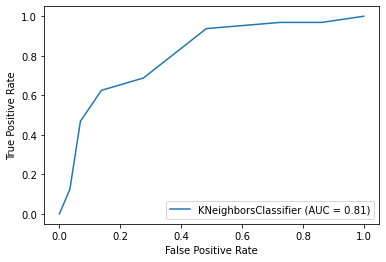

In [17]:
plot_roc_curve(best_KNN, X_test, y_test)

In [18]:
print(confusion_matrix(y_test,KNN_preds))

[[21  8]
 [10 22]]


In [19]:
def plot_conf_matrix (y_true, y_preds):
    """
    Function to plot a more visual form of confusion matrix using seaborn heatmap.
    
    Parameters
    -----------
    y_true : Actual labels
    y_preds : Predicted labels
    
    Returns
    -----------
    Plots a Heatmap for the hence obtained confusion matrix.
    -----------
    
    """
    conf = confusion_matrix(y_true, y_preds)
    conf_plot = sns.heatmap(data = conf, annot = True, cbar = False, cmap='coolwarm', annot_kws={'size':20})
    conf_plot.set_xlabel("True Labels", fontsize=25)
    conf_plot.set_ylabel("Predicted Label", fontsize=25)
    conf_plot.set_title("Confusion Matrix",fontsize=30)
    conf_plot.tick_params(labelsize=20)

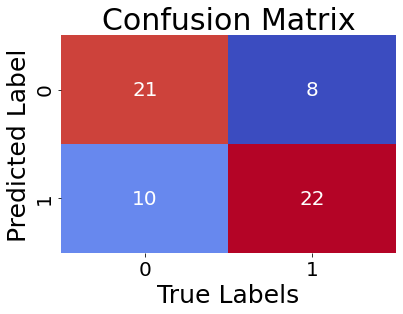

In [20]:
plot_conf_matrix(y_test, KNN_preds)

In [21]:
print(classification_report(y_test, KNN_preds))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        29
           1       0.73      0.69      0.71        32

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61



In [22]:
np.random.seed(42)
def cross_val_score_multi(model, X, y, sc_func={'Accuracy':'accuracy'}):
    """
    Evaluates multiple scoring functions using cross validation and returns mean value of each. 
    (Uses Function cross_val_score())
    
    Parameters
    -----------
    model : Takes a Classifier Model as input
    X: data (without labels)
    y: labels of the data given
    sc_func: Dictionary of different scoring functions by default 'accuracy' is given
    
    Returns
    -----------
    mean_score_dictionary : A dictionary with given names of evaluation functions and the mean of values obtained for each.
    -----------
    """
    cv_scores={}
    for name, fun in sc_func.items():
        cv_scores[name] = np.mean(cross_val_score(model, X, y, scoring=fun,cv = 5))
    return cv_scores

In [23]:
sc_func = {'Accuracy' : 'accuracy',
          'Precision': 'precision',
          'Recall': 'recall',
          'F1-Score':'f1'}

In [24]:
knn_cv_scores = cross_val_score_multi(best_KNN, X, y, sc_func)
knn_cv_scores

{'Accuracy': 0.6768306010928962,
 'Precision': 0.6870618740587782,
 'Recall': 0.7515151515151516,
 'F1-Score': 0.7171140244148443}

In [25]:
df_knn_cv_scores = pd.DataFrame(knn_cv_scores,index=[0])
df_knn_cv_scores

,Accuracy,Precision,Recall,F1-Score
0,0.676831,0.687062,0.751515,0.717114


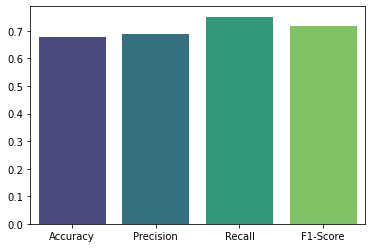

In [26]:
# sns.set(font_scale=1)
sns.barplot(data = df_knn_cv_scores, palette='viridis')


### Evaluating RandomForestClassifier
           with best hyperparameters obtained

In [27]:
np.random.seed(42)
# Random Forest Classifier with best hyperparameters
best_RF = RandomForestClassifier(max_depth = 10, min_samples_leaf = 11, min_samples_split = 14, n_estimators = 51)
# fit Random Forest Classifier
best_RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=11, min_samples_split=14,
                       n_estimators=51)

In [28]:
RF_preds=best_RF.predict(X_test)
RF_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

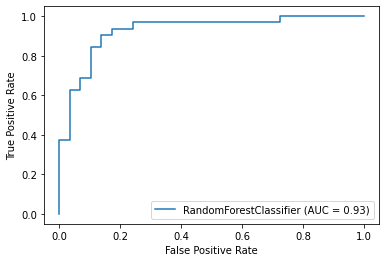

In [29]:
plot_roc_curve(best_RF, X_test, y_test)

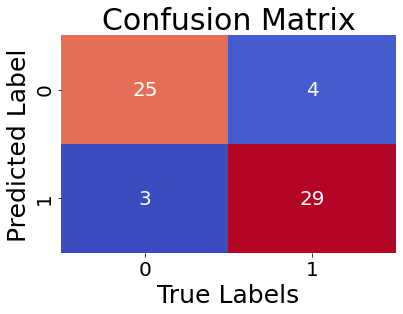

In [30]:
plot_conf_matrix(y_test, RF_preds)

In [31]:
print(classification_report(y_test,RF_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [32]:
rf_cv_scores = cross_val_score_multi(best_RF, X, y, sc_func)
rf_cv_scores

{'Accuracy': 0.844808743169399,
 'Precision': 0.8287742287742288,
 'Recall': 0.8727272727272727,
 'F1-Score': 0.8492827849839484}

In [33]:
df_rf_cv_scores = pd.DataFrame(data = rf_cv_scores, index=[0])
df_rf_cv_scores

,Accuracy,Precision,Recall,F1-Score
0,0.844809,0.828774,0.872727,0.849283


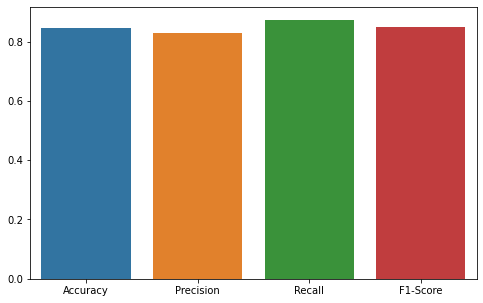

In [34]:
# sns.plotting_context(context='poster',font_scale=10)
plt.figure(figsize=(8,5))
sns.barplot(data=df_rf_cv_scores)


### Evaluating LogisticRegression
           with best hyperparameters obtained

In [35]:
np.random.seed(42)
# Logistic Regression with the best hyperparameters
best_LR = LogisticRegression( C = 0.18420699693267145, solver = 'liblinear')
# fit Logistic Regression
best_LR.fit(X_train, y_train)

LogisticRegression(C=0.18420699693267145, solver='liblinear')

In [36]:
LR_preds = best_LR.predict(X_test)
LR_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

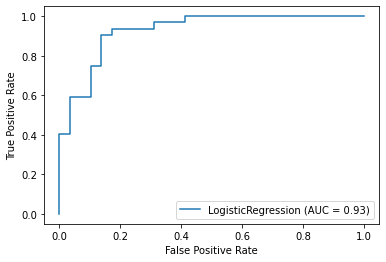

In [37]:
plot_roc_curve(best_LR, X_test, y_test)

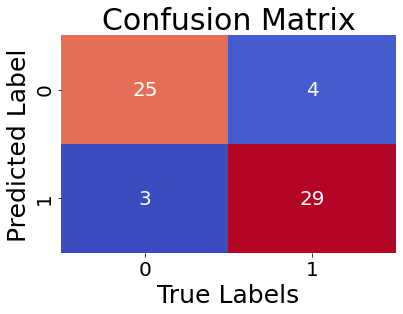

In [38]:
plot_conf_matrix(y_test, LR_preds)

In [39]:
lr_cv_scores = cross_val_score_multi(best_LR, X, y, sc_func)
lr_cv_scores

{'Accuracy': 0.8446994535519124,
 'Precision': 0.8207936507936507,
 'Recall': 0.9212121212121213,
 'F1-Score': 0.8673007976269721}

In [40]:
rf_cv_scores

{'Accuracy': 0.844808743169399,
 'Precision': 0.8287742287742288,
 'Recall': 0.8727272727272727,
 'F1-Score': 0.8492827849839484}

In [41]:
df_lr_cv_scores = pd.DataFrame(data= lr_cv_scores, index=[0])
df_lr_cv_scores

,Accuracy,Precision,Recall,F1-Score
0,0.844699,0.820794,0.921212,0.867301


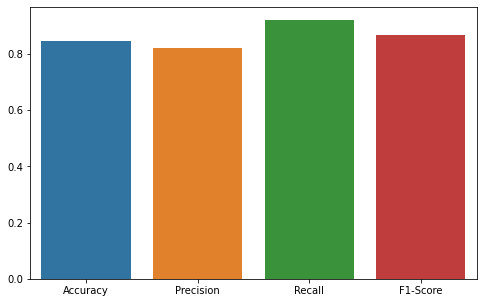

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_lr_cv_scores) #,sns.barplot(data=df_rf_cv_scores, alpha=0.6)

## Feature Importance

Which feature contributes most and how?

### Feature importance when KNN used

In [43]:
from sklearn.inspection import permutation_importance

In [44]:
KNN_imp = permutation_importance(best_KNN, X_train, y_train, scoring='neg_mean_squared_error')

In [45]:
KNN_imp

{'importances_mean': array([ 0.0214876 ,  0.01239669,  0.00165289,  0.01322314,  0.0322314 ,
        -0.00330579,  0.00743802,  0.12231405,  0.00991736, -0.00247934,
         0.00909091,  0.00661157,  0.00495868]),
 'importances_std': array([0.01151106, 0.00452663, 0.00421407, 0.02807486, 0.0267033 ,
        0.00165289, 0.00309228, 0.02963706, 0.00421407, 0.00421407,
        0.00309228, 0.00330579, 0.00165289]),
 'importances': array([[ 0.03305785,  0.01239669,  0.01652893,  0.03719008,  0.00826446],
        [ 0.01652893,  0.01239669,  0.00413223,  0.01239669,  0.01652893],
        [ 0.00413223,  0.        ,  0.00826446, -0.00413223,  0.        ],
        [-0.02479339,  0.02892562,  0.04132231, -0.01652893,  0.03719008],
        [ 0.        ,  0.01239669,  0.02479339,  0.07438017,  0.04958678],
        [-0.00413223, -0.00413223, -0.00413223,  0.        , -0.00413223],
        [ 0.00826446,  0.00826446,  0.01239669,  0.00413223,  0.00413223],
        [ 0.14876033,  0.0661157 ,  0.123966

In [46]:
KNN_feature_dict = dict(zip(df.columns, list(KNN_imp.importances_mean)))
print(KNN_feature_dict)
KNN_feature_df = pd.DataFrame(data = KNN_feature_dict, index = [0])
KNN_feature_df

{'age': 0.02148760330578512, 'sex': 0.012396694214876037, 'cp': 0.00165289256198346, 'trestbps': 0.013223140495867763, 'chol': 0.03223140495867768, 'fbs': -0.0033057851239669533, 'restecg': 0.007438016528925606, 'thalach': 0.12231404958677686, 'exang': 0.009917355371900815, 'oldpeak': -0.002479338842975215, 'slope': 0.009090909090909084, 'ca': 0.006611570247933874, 'thal': 0.004958677685950397}


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.021488,0.012397,0.001653,0.013223,0.032231,-0.003306,0.007438,0.122314,0.009917,-0.002479,0.009091,0.006612,0.004959


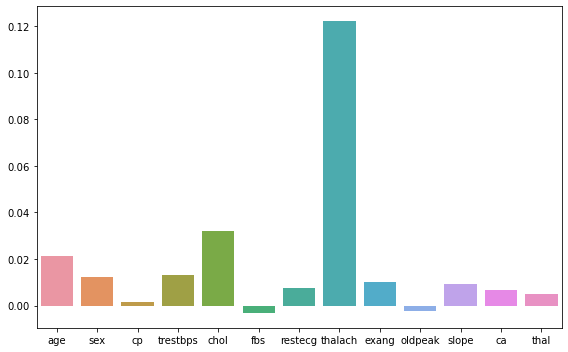

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(data = KNN_feature_df)
plt.tight_layout()

### Reference for plotting barplot when only one of the axis available

#### Method 1:
> sns.barplot(x=np.arange(0,len(KNN_imp.importances_mean)), y = KNN_imp.importances_mean)

#### Method 2:
> plt.bar([x for x in range(len(KNN_imp.importances_mean))], KNN_imp.importances_mean)  
  plt.show()

### Feature Importance when Random Forest Classifier used

In [48]:
RF_imp = best_RF.feature_importances_
RF_imp

array([0.0421219 , 0.03519622, 0.13794399, 0.02469611, 0.0239632 ,
       0.        , 0.01214697, 0.08596387, 0.1354375 , 0.13531913,
       0.09709886, 0.15319986, 0.11691238])

In [49]:
# Match feature importance to columns
RF_feature_dict = dict(zip(df.columns, list(RF_imp)))
print(RF_feature_dict)
RF_feature_df = pd.DataFrame(data = RF_feature_dict, index = [0])
RF_feature_df

{'age': 0.042121899235716076, 'sex': 0.03519621902388983, 'cp': 0.13794399022156115, 'trestbps': 0.02469611183568967, 'chol': 0.02396320242796877, 'fbs': 0.0, 'restecg': 0.012146970087595587, 'thalach': 0.08596386991735447, 'exang': 0.13543750489537004, 'oldpeak': 0.13531912800962617, 'slope': 0.09709886053208769, 'ca': 0.1531998609550133, 'thal': 0.11691238285812731}


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.042122,0.035196,0.137944,0.024696,0.023963,0.0,0.012147,0.085964,0.135438,0.135319,0.097099,0.1532,0.116912


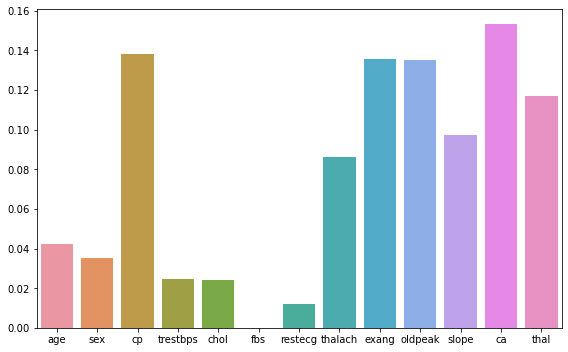

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(data = RF_feature_df)
plt.tight_layout()
# plt.show()

### Feature Importance when Logistic Regression used

In [51]:
LR_imp = best_LR.coef_[0]
LR_imp


array([ 0.00272731, -0.82426697,  0.64922701, -0.01156101, -0.00162997,
        0.04042661,  0.29835941,  0.02447544, -0.58181218, -0.56278478,
        0.4346521 , -0.62491287, -0.66115885])

In [52]:
LR_feature_dict = dict(zip(df.columns, list(LR_imp)))
LR_feature_dict

{'age': 0.002727314432465297,
 'sex': -0.8242669667450565,
 'cp': 0.6492270059465478,
 'trestbps': -0.011561008431277442,
 'chol': -0.0016299682970342174,
 'fbs': 0.040426611262114026,
 'restecg': 0.2983594075425178,
 'thalach': 0.02447544435835403,
 'exang': -0.5818121805887974,
 'oldpeak': -0.5627847763197283,
 'slope': 0.43465210004800964,
 'ca': -0.6249128716815715,
 'thal': -0.6611588536991418}

In [53]:
LR_feature_df = pd.DataFrame(data = LR_feature_dict, index = [0])
LR_feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.002727,-0.824267,0.649227,-0.011561,-0.00163,0.040427,0.298359,0.024475,-0.581812,-0.562785,0.434652,-0.624913,-0.661159


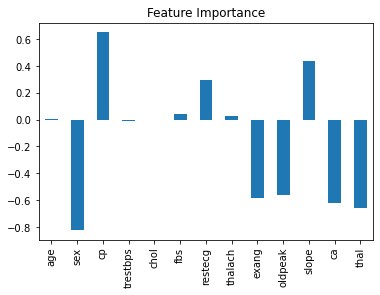

In [54]:
# Plotting using .plot.bar function requires us to first transpose the DataFrame
LR_feature_df.T.plot.bar(title="Feature Importance", legend=False);

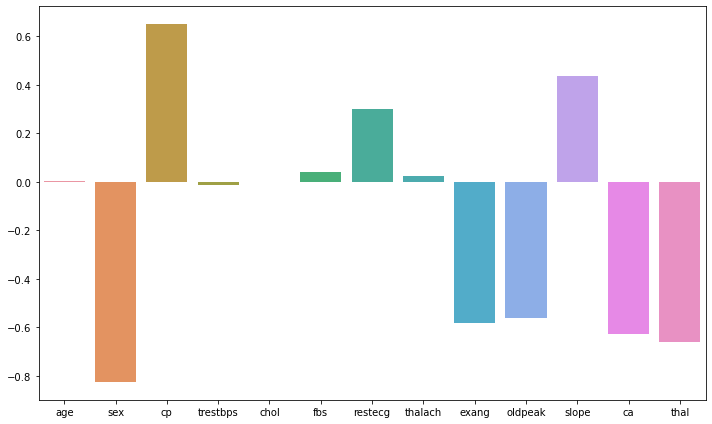

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(data = LR_feature_df)
plt.tight_layout()

### Finding out most important features from each classification

In [56]:
top_LR = LR_feature_df.T[np.abs(LR_feature_df.T.values) > 0.3].T
top_LR

,sex,cp,exang,oldpeak,slope,ca,thal
0,-0.824267,0.649227,-0.581812,-0.562785,0.434652,-0.624913,-0.661159


In [57]:
top_RF = RF_feature_df.T[np.abs(RF_feature_df.T.values) > 0.03].T
top_RF

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,0.042122,0.035196,0.137944,0.085964,0.135438,0.135319,0.097099,0.1532,0.116912


In [58]:
top_KNN = KNN_feature_df.T[np.abs(KNN_feature_df.T.values) > 0.01].T
top_KNN

,age,sex,trestbps,chol,thalach
0,0.021488,0.012397,0.013223,0.032231,0.122314


In [93]:
# Common important columns fro Random Forest and Logistic Regression
pd.DataFrame(top_LR.columns.intersection(top_RF.columns)).T

,0,1,2,3,4,5,6
0,sex,cp,exang,oldpeak,slope,ca,thal
